<a href="https://colab.research.google.com/github/safranco8/entregables-grupo-31/blob/main/introML/20220728_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
#010 librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# TODO: Agregar las librerías que hagan falta

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
#020 Carga de datos

#Alternativa Jupyter Notebook
#dataset = pd.read_csv("./data/loan_data.csv", comment="#")  

#Alternativa Google Colab
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment='#')   


In [ ]:
#021

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#030
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [ ]:
#031 Instancias
X

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...
1849,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [ ]:
#032 Etiquetas
y

0       0
1       0
2       0
3       0
4       0
       ..
1849    1
1850    1
1851    1
1852    1
1853    1
Name: TARGET, Length: 1854, dtype: int64


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?

    El conjunto de datos se trata de las métricas con la que una compañía valide la elegibilidad de un cliente para solicitar préstamo hipotecario.La empresa desea automatizar el proceso de elegibilidad del préstamo (en tiempo real) en función de los detalles del cliente proporcionados al completar el formulario de solicitud en línea. Estos detalles son Género, Estado Civil, Educación, Número de Dependientes, Ingresos, Monto del Préstamo, Historial de Crédito y otros.
    
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable a predecir es **TARGET** elegibilidad del préstamo. La misma toma valores de 1 para el cliente que incumplió con el pago del prestamo y 0 si el cliente cumplió.

3. ¿Qué información (atributos) hay disponible para hacer la predicción?

     Los atributos disponibles son Género, Estado Civil, Educación, Número de Dependientes, Ingresos, Monto del Préstamo, Historial de Crédito y otros
     
Name       |  Description

**TARGET**  Label: 1 = client defaulted on loan - 0 = loan repaid

**LOAN**    Importe de la solicitud de préstamo

**MORTDUE** Cantidad adeudada en la hipoteca existente

**VALUE**   Valor de la propiedad actual

**YOJ**     Años en el trabajo actual

**DEROG**   Número de informes despectivos importantes

**DELINQ**  Número de líneas de crédito morosas

**CLAGE**   Edad de la línea comercial más antigua en meses

**NINQ**    Número de líneas de crédito recientes

**CLNO**    Número de líneas de crédito

**DEBTINC** Relación deuda-ingresos


4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**VALUE**   Valor de la propiedad actual

**LOAN**    Importe de la solicitud de préstamo

**DEBTINC** Relación deuda-ingresos

**DELINQ**  Número de líneas de crédito morosas

**YOJ**     Años en el trabajo actual




**No hace falta escribir código para responder estas preguntas.**

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [ ]:
#040 Escalado (computo)
scaler = StandardScaler()
scaler.fit(X)

print("Atributos:", scaler.n_features_in_)
print("Escala:", ["{0:0.3f}".format(i) for i in scaler.scale_])
print("Media:", ["{0:0.3f}".format(i) for i in scaler.mean_])
print("Varianza:", ["{0:0.3f}".format(i) for i in scaler.var_])


Atributos: 10
Escala: ['10997.379', '46214.558', '56024.570', '7.551', '0.705', '0.928', '84.815', '1.664', '9.508', '9.306']
Media: ['19111.758', '76316.052', '107321.088', '8.900', '0.188', '0.320', '180.301', '1.129', '21.857', '34.573']
Varianza: ['120942342.863', '2135785377.396', '3138752426.237', '57.012', '0.497', '0.862', '7193.656', '2.769', '90.407', '86.607']


In [ ]:
#041 Escalado (transformacion)
X_train_esc = scaler.transform(X_train)
X_test_esc = scaler.transform(X_test)  
X_train_esc

array([[-0.88309755,  0.34672945,  0.32360644, ..., -0.07746527,
         0.01503261,  0.19089967],
       [-0.39207146, -0.69962915, -0.82990532, ..., -0.07746527,
        -1.35219751, -0.80218131],
       [ 0.08986156, -0.35897891, -0.48798391, ...,  0.5234578 ,
         0.6460619 ,  0.24429878],
       ...,
       [-0.57393297, -0.4796119 , -0.41933545, ..., -0.67838835,
        -0.61599668, -1.19231079],
       [ 0.19897847, -0.28244459, -0.23455938, ..., -0.07746527,
         0.01503261,  0.10486323],
       [-1.02858676, -0.14398172, -0.47877366, ..., -0.67838835,
        -0.82633977,  0.88477146]])

In [ ]:
#050 Entrenamiento 
model_1 = SGDClassifier(random_state=42)  #con random_state=42 estamos fijando una semilla aleatoria que comienza con el parametro 42
model_1 = model_1.fit(X_train_esc, y_train) #Entrenamiento

In [ ]:
#060 Predecimos la salida a partir de los datos de entrenamiento
y_train_pred = model_1.predict(X_train_esc)
y_test_pred = model_1.predict(X_test_esc)
#model_1.coef_ #para ver los coeficientes de w
np.set_printoptions(threshold=sys.maxsize)
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
np.array(y_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

### **Evaluamos sobre el conjunto de entrenamiento y sobre el conjunto de evaluación**

In [ ]:
#070 Evaluación Accuracy para el conjunto de entrenamiento
print("Evaluación Accuracy para el conjunto de entrenamiento =",  accuracy_score(y_train, y_train_pred))
#071 Evaluación Accuracy para el conjunto de evaluación
print("Evaluación Accuracy para el conjunto de evaluación =",  accuracy_score(y_test, y_test_pred))

Evaluación Accuracy para el conjunto de entrenamiento = 0.8590694538098449
Evaluación Accuracy para el conjunto de evaluación = 0.8733153638814016


In [ ]:
#080 Evaluación Precisión para el conjunto de entrenamiento
print("Evaluación Precisión para el conjunto de entrenamiento =",  precision_score(y_train, y_train_pred)) # precision 
#081 Evaluación Precisión para el conjunto de evaluación
print("Evaluación Precisión para el conjunto de evaluación=",  precision_score(y_test, y_test_pred)) # precision 

Evaluación Precisión para el conjunto de entrenamiento = 0.7142857142857143
Evaluación Precisión para el conjunto de evaluación= 0.72


In [ ]:
#090 Evaluación Recall para el conjunto de entrenamiento
print("Evaluación Recall para el conjunto de entrenamiento =", recall_score(y_train, y_train_pred) )
recall_score(y_train, y_train_pred)  # recall 
#091 Evaluación Recall para el conjunto de evaluación
print("Evaluación Recall para el conjunto de evaluación =", recall_score(y_test, y_test_pred) )  # recall 

Evaluación Recall para el conjunto de entrenamiento = 0.2788844621513944
Evaluación Recall para el conjunto de evaluación = 0.3103448275862069


In [ ]:
#100 Evaluación F1 para el conjunto de entrenamiento
print("Evaluación F1 para el conjunto de entrenamiento =", f1_score(y_train, y_train_pred) )
#101 Evaluación F1 para el conjunto de evaluación
print("Evaluación F1 para el conjunto de evaluación =", f1_score(y_test, y_test_pred) )


Evaluación F1 para el conjunto de entrenamiento = 0.40114613180515757
Evaluación F1 para el conjunto de evaluación = 0.4337349397590362


In [ ]:
#110 classification_report para el conjunto de entrenamiento
print("Reporte de Clasificación para el conjunto de entrenamiento \n" )
print(classification_report(y_train, y_train_pred))
#111 classification_report para el conjunto de evaluación
print("Reporte de Clasificación para el conjunto de evaluación \n" )
print(classification_report(y_test, y_test_pred))

Reporte de Clasificación para el conjunto de entrenamiento 

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1232
           1       0.71      0.28      0.40       251

    accuracy                           0.86      1483
   macro avg       0.79      0.63      0.66      1483
weighted avg       0.84      0.86      0.83      1483

Reporte de Clasificación para el conjunto de evaluación 

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       313
           1       0.72      0.31      0.43        58

    accuracy                           0.87       371
   macro avg       0.80      0.64      0.68       371
weighted avg       0.86      0.87      0.85       371



In [ ]:
#120 Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_train_pred)
print("Matriz de confusión para el conjunto de entrenamiento\n", cm_train) #cm_train.T

#121 Matriz de confusión para el conjunto de evaluación
cm_test = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión para el conjunto de evaluación\n", cm_test) #cm_test.T

Matriz de confusión para el conjunto de entrenamiento
 [[1204   28]
 [ 181   70]]
Matriz de confusión para el conjunto de evaluación
 [[306   7]
 [ 40  18]]


In [ ]:
#122 Visualizacion mas explicita
train_tn, train_fp, train_fn, train_tp = cm_train.ravel()
(train_tn, train_fp, train_fn, train_tp)

print("tn=", train_tn, "fp=", train_fp)
print("fn=", train_fn, "tp=", train_tp)

tn= 1204 fp= 28
fn= 181 tp= 70


In [ ]:
#123 Visualizacion mas explicita
test_tn, test_fp, test_fn, test_tp = cm_test.ravel()

print("tn=", test_tn, "fp=", test_fp)
print("fn=", test_fn, "tp=", test_tp)

tn= 306 fp= 7
fn= 40 tp= 18


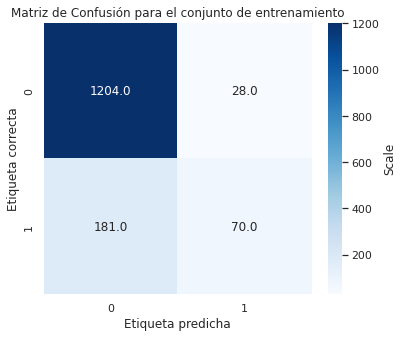

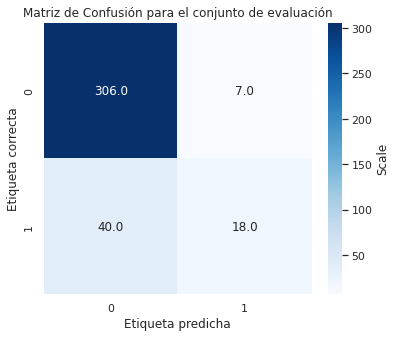

In [ ]:
#130 Matriz de confusión para el conjunto de entrenamiento
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión para el conjunto de entrenamiento" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm_train, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set(ylabel='Etiqueta correcta', xlabel='Etiqueta predicha')
plt.show()
#131 Matriz de confusión para el conjunto de evaluación
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión para el conjunto de evaluación" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm_test, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set(ylabel='Etiqueta correcta', xlabel='Etiqueta predicha')
plt.show()

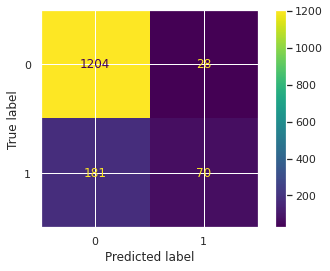

In [ ]:
#131 Matriz de confusión para el conjunto de entrenamiento (usando sklearn)

train_cm_to_display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model_1.classes_)
train_cm_to_display.plot()
plt.show()

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
y.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#140 División K-Fold Estratificada

# Demostramos como se puede implementar División K-Fold Estratificada, 
# pero la funcion GridSearchCV ya la tiene incorporada con parametro 'cv'

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)

X_train_kfold = []
X_test_kfold = []
y_train_kfold = []
y_test_kfold = []

for train_index, test_index in kf.split(X, y):
    X_train_this_fold, X_test_this_fold = X.values[train_index], X.values[test_index]
    y_train_this_fold, y_test_this_fold = y.values[train_index], y.values[test_index]

    print(f"TRAIN: {train_index} TEST: {test_index}")

    #Funciona, pero se visualizan mejor los indices solamente
    #print(f"TRAIN: {X_train_this_fold} TEST: {X_test_this_fold}") 

    #OJO, el X que guarda NO esta escalado
    X_train_kfold.append(X_train_this_fold)
    X_test_kfold.append(X_test_this_fold)
    y_train_kfold.append(y_train_this_fold)
    y_test_kfold.append(y_test_this_fold)



TRAIN: [   0    1    4    5    6    7    8    9   10   11   12   13   14   15
   16   17   18   19   20   21   22   23   24   25   26   27   28   29
   31   32   33   34   35   37   38   40   41   42   43   44   46   47
   49   50   53   54   55   56   59   60   61   62   64   65   66   67
   68   69   70   71   72   73   74   75   76   77   78   80   81   82
   83   84   85   86   88   91   92   93   95   96   97   99  100  102
  103  104  105  106  107  108  109  111  112  113  114  115  116  117
  118  119  120  122  123  124  125  127  128  130  131  133  135  136
  138  140  142  143  144  145  146  148  149  150  151  152  153  154
  155  156  157  158  159  160  163  164  165  166  167  168  169  170
  171  172  174  175  177  178  179  180  182  183  184  185  186  187
  188  189  190  191  192  193  194  195  196  197  198  199  200  203
  204  205  206  207  209  210  212  214  216  217  218  219  221  222
  223  224  225  226  227  228  229  230  231  232  233  234  236  237

In [ ]:
#140 Visualización de los parametros del modelo
model_2 = SGDClassifier(random_state=42, eta0=0.01)  #con random_state=42 estamos fijando una semilla aleatoria que comienza con el parametro 42
model_2.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#150 configuramos valores distimtos de los hiperparámetros principales del SGDClassifier

# Diferentes funciones de loss
# loss: ['hinge', 'log', 'perceptron', 'squared_hinge'] 

# Tasas de entrenamiento
# learning_rate:['constant', 'optimal','invscaling','adaptive'] 

# Penalidad o término de regularización
# penalty:['l2', 'l1', 'elasticnet']

# Tasas de regularización (Constante que multiplica el término de regularización)
# alpha: [0.001, 0.0001, 0.00001, 1.0, 10.0] 

param_grid = {
    'eta0': [0.1, 0.01, 0.001, 0.00001],
    'loss': ['hinge', 'log', 'perceptron','squared_hinge'],
    'learning_rate':['constant', 'optimal','invscaling','adaptive'],
    'penalty':['l2', 'l1', 'elasticnet'],
    'alpha': [0.001, 0.0001, 0.00001, 1.0, 10.0]
     } 
print(f'Combinaciones posibles: {len(ParameterGrid(param_grid))}')

Combinaciones posibles: 960


In [ ]:
#160 Listamos todas las combinaciones para usarlas con ParameterGrid
for params in ParameterGrid(param_grid):
    print(params)

{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l2'}
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l1'}
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'elasticnet'}
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'l2'}
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'l1'}
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'elasticnet'}
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'perceptron', 'penalty': 'l2'}
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'perceptron', 'penalty': 'l1'}
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'perceptron', 'penalty': 'elasticnet'}
{'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'squared_hinge', 'penalty': 'l2'}
{'alpha': 0.001, 'eta0': 0.1,

In [ ]:
#170 Probamos valores distimtos de los hiperparámetros principales del SGDClassifier

cv = GridSearchCV(model_2, param_grid, scoring ='accuracy', cv=5, verbose=3)

# Se entrena el modelo con el conjunto de entrenamiento
cv.fit(X_train_esc, y_train);

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV 1/5] END alpha=0.001, eta0=0.1, learning_rate=constant, loss=hinge, penalty=l2;, score=0.845 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=0.1, learning_rate=constant, loss=hinge, penalty=l2;, score=0.865 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=0.1, learning_rate=constant, loss=hinge, penalty=l2;, score=0.862 total time=   0.0s
[CV 4/5] END alpha=0.001, eta0=0.1, learning_rate=constant, loss=hinge, penalty=l2;, score=0.878 total time=   0.0s
[CV 5/5] END alpha=0.001, eta0=0.1, learning_rate=constant, loss=hinge, penalty=l2;, score=0.855 total time=   0.0s
[CV 1/5] END alpha=0.001, eta0=0.1, learning_rate=constant, loss=hinge, penalty=l1;, score=0.855 total time=   0.0s
[CV 2/5] END alpha=0.001, eta0=0.1, learning_rate=constant, loss=hinge, penalty=l1;, score=0.828 total time=   0.0s
[CV 3/5] END alpha=0.001, eta0=0.1, learning_rate=constant, loss=hinge, penalty=l1;, score=0.862 total time=   0.0s
[CV 4/5]

In [ ]:
#180 Tabla de resultados para analizar los posibles mejores clasificadores obtenidos
results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

#print("The loss function\t|\tlearning_rate\t|\tpenalty\t|\talpha\t|\tmean\t|\tstd\t|\trank")
#for p, m, s, r in zip(params, mean, std, rank):
#    print(f"{p['loss']}\t|\t{p['learning_rate']}\t|\t{p['penalty']}\t|\t{p['alpha']}\t|\t{m:0.2f}\t|\t{s:0.2f}\t|\t{r}")


In [ ]:
#190 Dataframe para visualizar mejor con solo las variables de interes
df = pd.DataFrame(results)
df[['param_loss', 'param_eta0', 'param_learning_rate', 'param_penalty', 'param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']]

# Mostramos los 10 mejores parametros que dieron los mejores resultados

mejores_parametros = df.sort_values('rank_test_score', ascending=True).head(10)
mejores_parametros[['param_loss', 'param_eta0', 'param_learning_rate', 'param_penalty', 'param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']] 

,param_loss,param_eta0,param_learning_rate,param_penalty,param_alpha,mean_test_score,std_test_score,rank_test_score
4,log,0.1,constant,l1,0.001,0.873239,0.011306,1
37,hinge,0.1,adaptive,l1,0.001,0.871208,0.009139,2
85,hinge,0.01,adaptive,l1,0.001,0.871208,0.009139,2
51,log,0.01,constant,l2,0.001,0.870539,0.012127,4
245,log,0.01,constant,elasticnet,0.0001,0.870536,0.012524,5
243,log,0.01,constant,l2,0.0001,0.870536,0.012524,5
435,log,0.01,constant,l2,0.00001,0.870536,0.012524,5
436,log,0.01,constant,l1,0.00001,0.870536,0.012524,5
437,log,0.01,constant,elasticnet,0.00001,0.870536,0.012524,5
421,hinge,0.1,adaptive,l1,0.00001,0.869861,0.007829,10


In [ ]:
#200 Seleción del mejor modelo
best_model = cv.best_estimator_
best_model

SGDClassifier(alpha=0.001, eta0=0.1, learning_rate='constant', loss='log',
              penalty='l1', random_state=42)

In [ ]:
#210 Parametros del mejor modelo
cv.best_params_

{'alpha': 0.001,
 'eta0': 0.1,
 'learning_rate': 'constant',
 'loss': 'log',
 'penalty': 'l1'}

In [ ]:
#220 Evaluación con los mejores parámetros en el conjunto de entrenamiento y evaluación
y_pred_train_best = best_model.predict(X_train_esc) 
y_pred_test_best = best_model.predict(X_test_esc) 

In [ ]:
#230 Reporte de Clasificación para el conjunto de entrenamiento y evaluación con los mejores parámetros
print("Reporte de Clasificación para el conjunto de entrenamiento\n")
print(classification_report(y_train, y_pred_train_best),"\n")
print("Reporte de Clasificación para el conjunto de evaluación\n")
print(classification_report(y_test, y_pred_test_best))

Reporte de Clasificación para el conjunto de entrenamiento

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1232
           1       0.76      0.27      0.40       251

    accuracy                           0.86      1483
   macro avg       0.81      0.62      0.66      1483
weighted avg       0.85      0.86      0.83      1483
 

Reporte de Clasificación para el conjunto de evaluación

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       313
           1       0.65      0.26      0.37        58

    accuracy                           0.86       371
   macro avg       0.76      0.62      0.65       371
weighted avg       0.84      0.86      0.84       371



Matriz de Confusión para el conjunto de entrenamiento con hiperparámetros por default 
 [[1204   28]
 [ 181   70]]
Matriz de Confusión para el conjunto de evaluación con hiperparámetros por default  
 [[306   7]
 [ 40  18]]


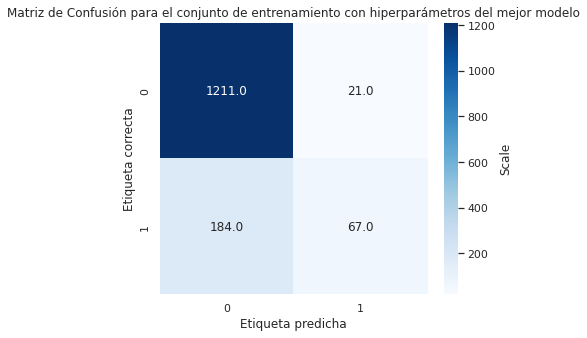

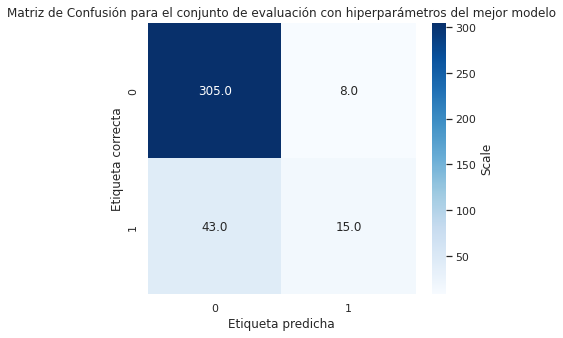

In [ ]:
#240 Matriz de confusión para el conjunto de entrenamiento y evaluación
# NOTA: comparamos versus la matriz de confusion anterior, para ver la mejora

cm_train_best = confusion_matrix(y_train, y_pred_train_best)
print("Matriz de Confusión para el conjunto de entrenamiento con hiperparámetros por default \n",cm_train )

cm_test_best = confusion_matrix(y_test, y_pred_test_best)
print("Matriz de Confusión para el conjunto de evaluación con hiperparámetros por default  \n",cm_test )

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión para el conjunto de entrenamiento con hiperparámetros del mejor modelo" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm_train_best, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set(ylabel='Etiqueta correcta', xlabel='Etiqueta predicha')
plt.show()

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión para el conjunto de evaluación con hiperparámetros del mejor modelo" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm_test_best, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set(ylabel='Etiqueta correcta', xlabel='Etiqueta predicha')
plt.show()

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [ ]:
#250 Clasificamos con el arbol de decisión

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#260 Obtenemos los resultados predichos, 
# tanto del dataset de entrenamiento como el de test
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
#270 Evaluación Accuracy para el conjunto de entrenamiento y evaluación
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.88


In [ ]:
#280 Evaluación Precision para el conjunto de entrenamiento y evaluación
train_pre=precision_score(y_train, y_train_pred)  # precision 
test_pre=precision_score(y_test, y_test_pred)  # precision 
print(f'Train precision: {train_pre:0.2}')
print(f'Test precision: {test_pre:0.2}')

Train precision: 1.0
Test precision: 0.62


In [ ]:
#290 Evaluación Recall para el conjunto de entrenamiento y evaluación
train_rec=recall_score(y_train, y_train_pred)  # recall 
test_rec=recall_score(y_test, y_test_pred)  # recall 
print(f'Train recall: {train_rec:0.2}')
print(f'Test recall: {test_rec:0.2}')

Train recall: 1.0
Test recall: 0.64


In [ ]:
#300 Evaluación F1 para el conjunto de entrenamiento y evaluación
print(f'Train f1_score: {f1_score(y_train, y_train_pred):0.2}')
print(f'Test f1_score: {f1_score(y_test, y_test_pred):0.2}')

Train f1_score: 1.0
Test f1_score: 0.63


In [ ]:
#310 Matriz de confusión para el conjunto de entrenamiento y evaluación
cm_train_tree = confusion_matrix(y_train, y_train_pred)

cm_test_tree = confusion_matrix(y_test, y_test_pred)

print("Matriz de confusión para el conjunto de entrenamiento: \n",cm_train_tree)
print("Matriz de confusión para el conjunto de evaluación: \n",cm_test_tree)

Matriz de confusión para el conjunto de entrenamiento: 
 [[1232    0]
 [   0  251]]
Matriz de confusión para el conjunto de evaluación: 
 [[290  23]
 [ 21  37]]


In [ ]:
#320 classification_report para el conjunto de entrenamiento y evaluación
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0.63        58

    accuracy                           0.88       371
   macro avg       0.77      0.78      0.78       371
weighted avg       0.88      0.88      0.88       371



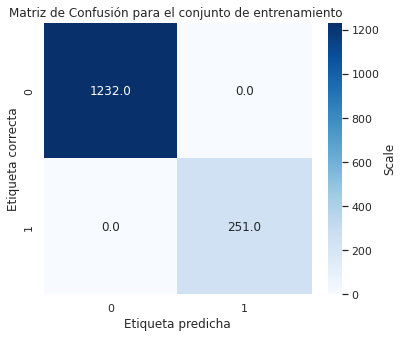

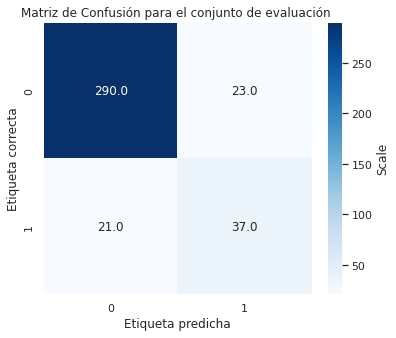

In [ ]:
#330 Matriz de confusión para el conjunto de entrenamiento y evaluación
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión para el conjunto de entrenamiento " )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm_train_tree, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set(ylabel='Etiqueta correcta', xlabel='Etiqueta predicha')
plt.show()

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión para el conjunto de evaluación " )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm_test_tree, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set(ylabel='Etiqueta correcta', xlabel='Etiqueta predicha')
plt.show()

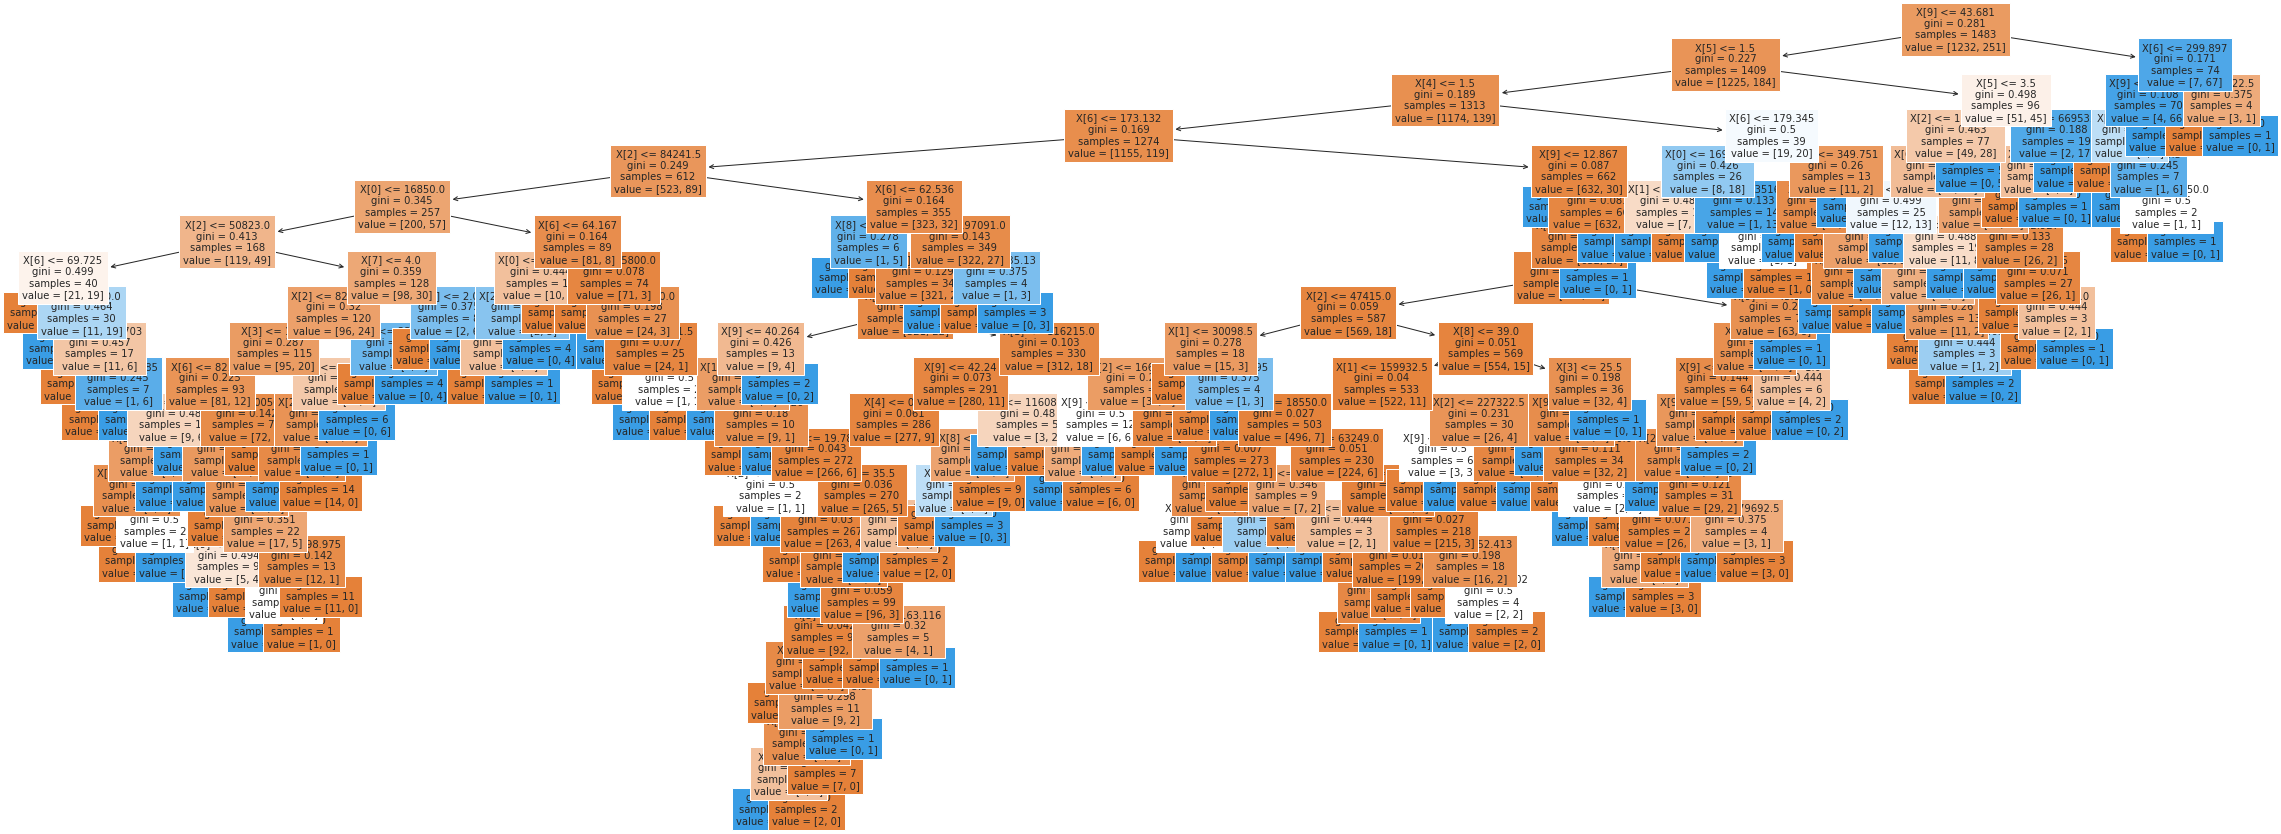

In [ ]:
#340 Graficamos el arbol de decisión
plt.figure(figsize = (40, 15))
plot_tree(clf, filled=True, fontsize = 10)
plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
#350 Grilla de Parámetros

#DecisionTreeClassifier??

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 4, 8, None],
    'splitter' : ["best", "random"],
    'min_samples_leaf': [1, 10, 50, 100, 200]
}

print(f'Combinaciones posibles: {len(ParameterGrid(param_grid))}')

Combinaciones posibles: 100


In [ ]:
#360 Podemos listar todas las combinaciones para usarlas a mano con ParameterGrid
for params in ParameterGrid(param_grid):
    print(params)


{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 50, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 50, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 100, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 100, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 200, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 200, 'splitter': 'random'}
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'splitter': 'best'}
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'splitter': 'random'}
{'cr

In [ ]:
#370 Grilla de Parámetros + Validación Cruzada
model = DecisionTreeClassifier(random_state=0)
cv = GridSearchCV(model, param_grid, scoring='accuracy', cv=5, verbose=3)
cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=best;, score=0.859 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=best;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=best;, score=0.872 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=best;, score=0.885 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=best;, score=0.868 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=random;, score=0.828 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=random;, score=0.855 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, min_samples_leaf=1, splitter=random;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, min_samples_leaf=

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 8, None],
                         'min_samples_leaf': [1, 10, 50, 100, 200],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [ ]:
#380 Tabla de resultados para analizar los posibles mejores parametros
# para los clasificadores

results = cv.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("crit.\tdepth\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['criterion']}\t{p['max_depth']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

crit.	depth	| mean	std	rank
gini	1	| 0.87	0.01	24
gini	1	| 0.83	0.01	65
gini	1	| 0.87	0.01	24
gini	1	| 0.83	0.01	65
gini	1	| 0.87	0.01	14
gini	1	| 0.83	0.01	65
gini	1	| 0.85	0.01	42
gini	1	| 0.83	0.00	71
gini	1	| 0.83	0.00	71
gini	1	| 0.83	0.00	71
gini	2	| 0.87	0.01	12
gini	2	| 0.85	0.00	53
gini	2	| 0.87	0.01	11
gini	2	| 0.85	0.00	53
gini	2	| 0.87	0.01	14
gini	2	| 0.84	0.01	59
gini	2	| 0.85	0.01	42
gini	2	| 0.83	0.00	71
gini	2	| 0.83	0.00	71
gini	2	| 0.83	0.00	71
gini	4	| 0.88	0.01	2
gini	4	| 0.87	0.01	34
gini	4	| 0.88	0.01	1
gini	4	| 0.86	0.02	37
gini	4	| 0.87	0.01	14
gini	4	| 0.84	0.02	57
gini	4	| 0.85	0.01	42
gini	4	| 0.83	0.00	71
gini	4	| 0.83	0.00	71
gini	4	| 0.83	0.00	71
gini	8	| 0.88	0.02	3
gini	8	| 0.88	0.01	7
gini	8	| 0.88	0.02	4
gini	8	| 0.86	0.01	40
gini	8	| 0.87	0.01	14
gini	8	| 0.83	0.01	61
gini	8	| 0.85	0.01	42
gini	8	| 0.83	0.00	71
gini	8	| 0.83	0.00	71
gini	8	| 0.83	0.00	71
gini	None	| 0.85	0.02	52
gini	None	| 0.87	0.02	29
gini	None	| 0.88	0.01	6
gini	None	| 0.86	0.02	3

In [ ]:
#390 Dataframe para visualizar mejor con solo las variables de interes

df = pd.DataFrame(results)
columns = ['param_criterion', 'param_max_depth', 'param_splitter', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']
df[columns]

# Mostramos los 10 mejores parametros que dieron los mejores resultados

mejores_parametros_tree = df.sort_values('rank_test_score', ascending=True).head(10)
mejores_parametros_tree[columns] 
#df

,param_criterion,param_max_depth,param_splitter,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
22,gini,4,best,10,0.879302,0.008843,1
20,gini,4,best,1,0.878633,0.014701,2
30,gini,8,best,1,0.878631,0.019732,3
32,gini,8,best,10,0.877960,0.020304,4
72,entropy,4,best,10,0.877960,0.009273,4
42,gini,None,best,10,0.876604,0.014675,6
31,gini,8,random,1,0.875933,0.013006,7
80,entropy,8,best,1,0.875248,0.011142,8
82,entropy,8,best,10,0.874575,0.007260,9
91,entropy,None,random,1,0.873888,0.018537,10


In [ ]:
#400 Selecciona el mejor modelo
best_model_tree = cv.best_estimator_

In [ ]:
#410 Muestra los parametros del mejor modelo
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 10,
 'splitter': 'best'}

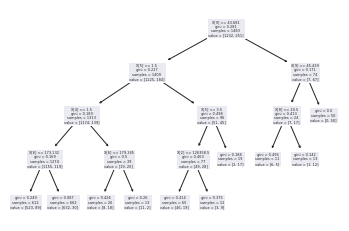

In [ ]:
#420 Mostramos el mejor modelo
plot_tree(best_model_tree);

In [ ]:
#430 Mostramos la cantidad de clases 
best_model_tree.classes_

array([0, 1])

In [ ]:
#440 Evaluación con los mejores parámetros en el conjunto de entrenamiento y evaluación
y_pred_train_best_tree = best_model_tree.predict(X_train) 
y_pred_test_best_tree = best_model_tree.predict(X_test) 


In [ ]:
#450 Reporte de Clasificación para el conjunto de entrenamiento y evaluación con los mejores parámetros
print("Reporte de Clasificación para el conjunto de entrenamiento\n")
print(classification_report(y_train, y_pred_train_best_tree),"\n")
print("Reporte de Clasificación para el conjunto de evaluación\n")
print(classification_report(y_test, y_pred_test_best_tree))

Reporte de Clasificación para el conjunto de entrenamiento

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1232
           1       0.88      0.42      0.57       251

    accuracy                           0.89      1483
   macro avg       0.89      0.71      0.76      1483
weighted avg       0.89      0.89      0.88      1483
 

Reporte de Clasificación para el conjunto de evaluación

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       313
           1       0.76      0.43      0.55        58

    accuracy                           0.89       371
   macro avg       0.83      0.70      0.74       371
weighted avg       0.88      0.89      0.88       371



Matriz de Confusión para el conjunto de entrenamiento con hiperparámetros por default 
 [[1232    0]
 [   0  251]]
Matriz de Confusión para el conjunto de evaluación con hiperparámetros por default  
 [[290  23]
 [ 21  37]]


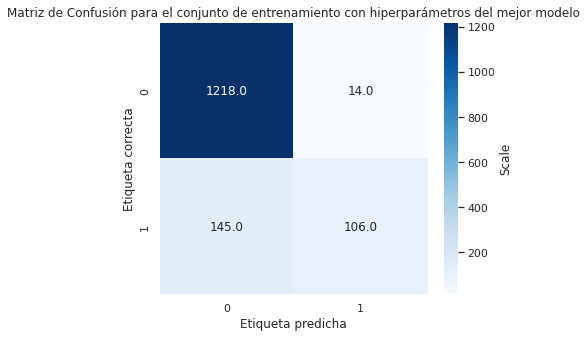

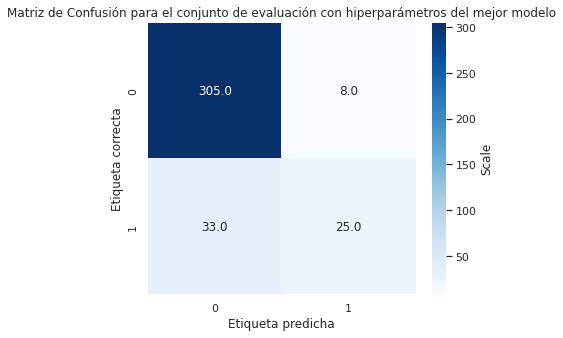

In [ ]:
#460 Matriz de confusión para el conjunto de entrenamiento y evaluación
# NOTA: comparamos la matriz de confusion contra el modelo por defecto

cm_train_best_tree = confusion_matrix(y_train, y_pred_train_best_tree)

print("Matriz de Confusión para el conjunto de entrenamiento con hiperparámetros por default \n",cm_train_tree )

cm_test_best_tree = confusion_matrix(y_test, y_pred_test_best_tree)
print("Matriz de Confusión para el conjunto de evaluación con hiperparámetros por default  \n",cm_test_tree )

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión para el conjunto de entrenamiento con hiperparámetros del mejor modelo" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm_train_best_tree, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set(ylabel='Etiqueta correcta', xlabel='Etiqueta predicha')
plt.show()

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))
plt.title("Matriz de Confusión para el conjunto de evaluación con hiperparámetros del mejor modelo" )
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm_test_best_tree, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set(ylabel='Etiqueta correcta', xlabel='Etiqueta predicha')
plt.show()